<a href="https://colab.research.google.com/github/BrMrtn/GoogleColab/blob/main/K%C3%A9pfeldolgoz%C3%A1s/khf1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Könyvtárak importálása

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

Képek letöltése

In [23]:
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/nature.jpg
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/iceberg.png
!wget https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/netflix.png

--2024-10-11 17:50:16--  https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/nature.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19266 (19K) [image/jpeg]
Saving to: ‘nature.jpg’

nature.jpg          100%[===================>]  18.81K  --.-KB/s    in 0.001s  

2024-10-11 17:50:16 (24.1 MB/s) - ‘nature.jpg’ saved [19266/19266]

--2024-10-11 17:50:16--  https://raw.githubusercontent.com/BrMrtn/GoogleColab/main/resources/iceberg.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53226 (52K) [image/png]
Saving t

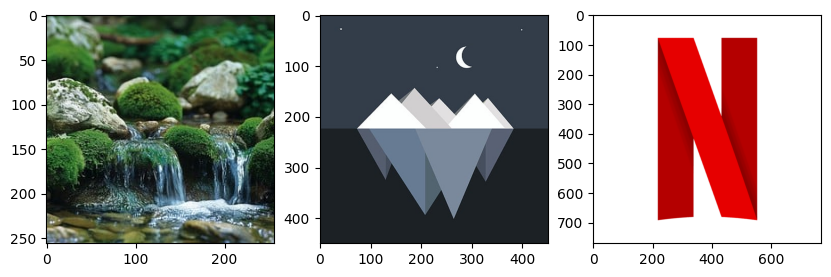

In [25]:
# képek beolvasása
img1 = cv2.imread("nature.jpg")
img2 = cv2.imread("iceberg.png")
img3 = cv2.imread("netflix.png")

# BGR-ből RGB-be konvertálás
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# kép megjelenítése
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(img1)
axs[1].imshow(img2)
axs[2].imshow(img3)

Képek szín-bitmélységének megváltoztatása

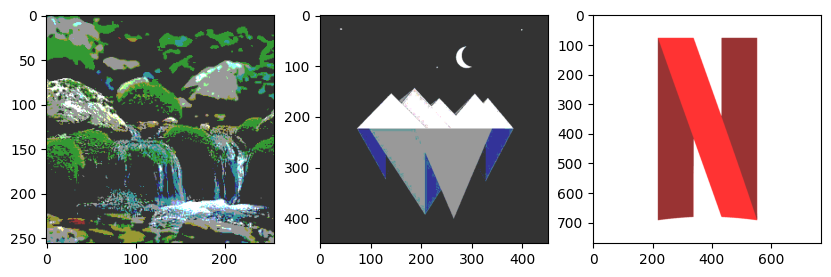

In [31]:
# Képek kvantálása
def quantize_image(image):
    div = 102 # hány részre osztjuk minden csatornán a 256-ot
    quantized_image = image // div * div + div // 2 # // a maradék nélküli osztás, vagyis csak a 16-tal osztható értékek maradnak a képben
    return quantized_image

img1_q = quantize_image(img1)
img2_q = quantize_image(img2)
img3_q = quantize_image(img3)

# Képek megjelenítése
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(img1_q)
axs[1].imshow(img2_q)
axs[2].imshow(img3_q)

A középső képen a legészrevehetőbb a színtér méretének csökkentése. Ennek oka, hogy sok "egymáshoz közeli" szín szerepel rajta (szürkének sok árnyalata). Így valamelyik jéghegy még a szürke tartományba esik, egy másik pedig már fehérbe, kékbe, feketébe.

Képek méretének csökkentése

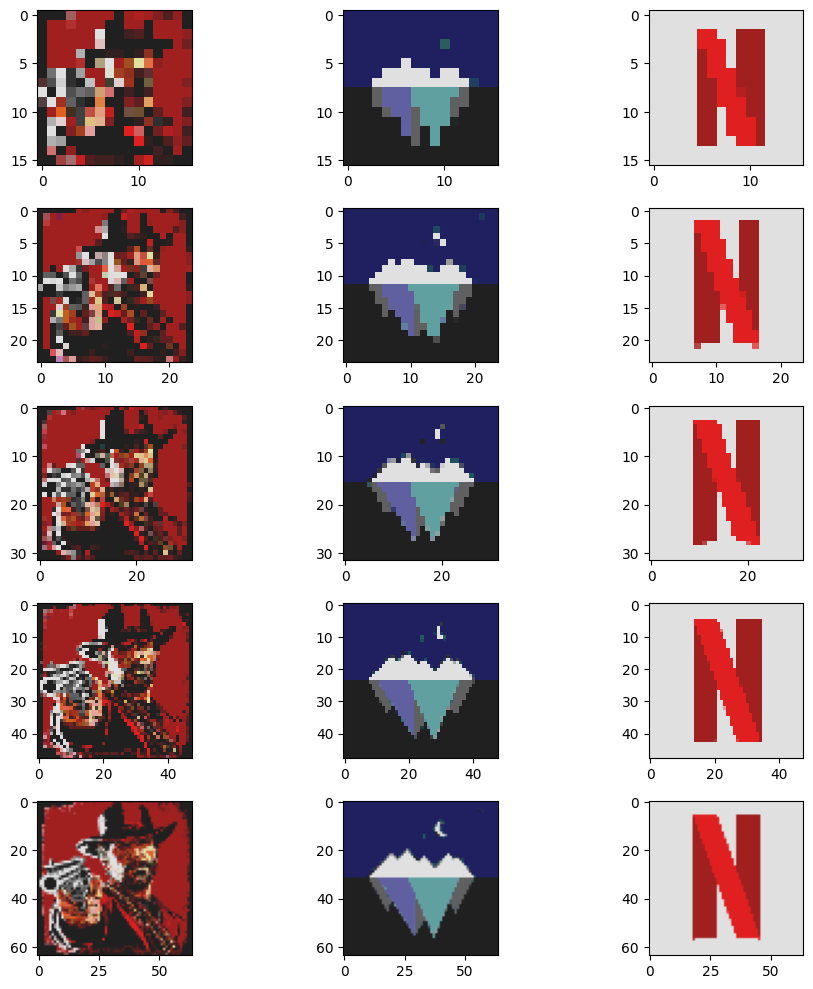

In [21]:
icon1_16 = cv2.resize(img1_q, (16, 16))
icon2_16 = cv2.resize(img2_q, (16, 16))
icon3_16 = cv2.resize(img3_q, (16, 16))

icon1_24 = cv2.resize(img1_q, (24, 24))
icon2_24 = cv2.resize(img2_q, (24, 24))
icon3_24 = cv2.resize(img3_q, (24, 24))

icon1_32 = cv2.resize(img1_q, (32, 32))
icon2_32 = cv2.resize(img2_q, (32, 32))
icon3_32 = cv2.resize(img3_q, (32, 32))

icon1_48 = cv2.resize(img1_q, (48, 48))
icon2_48 = cv2.resize(img2_q, (48, 48))
icon3_48 = cv2.resize(img3_q, (48, 48))

icon1_64 = cv2.resize(img1_q, (64, 64))
icon2_64 = cv2.resize(img2_q, (64, 64))
icon3_64 = cv2.resize(img3_q, (64, 64))

fig, axs = plt.subplots(5, 3, figsize=(10, 10))
axs[0, 0].imshow(icon1_16)
axs[0, 1].imshow(icon2_16)
axs[0, 2].imshow(icon3_16)

axs[1, 0].imshow(icon1_24)
axs[1, 1].imshow(icon2_24)
axs[1, 2].imshow(icon3_24)

axs[2, 0].imshow(icon1_32)
axs[2, 1].imshow(icon2_32)
axs[2, 2].imshow(icon3_32)

axs[3, 0].imshow(icon1_48)
axs[3, 1].imshow(icon2_48)
axs[3, 2].imshow(icon3_48)

axs[4, 0].imshow(icon1_64)
axs[4, 1].imshow(icon2_64)
axs[4, 2].imshow(icon3_64)

plt.tight_layout()

Az eredményen látszik, hogy a kevesebb részlettel rendelkező, egyszerűbb alakzatokból összeálló képekből jobb ikonok lesznek.